# Praktikum 1.2 Natural Language Processing

### Nama : Ronggur Mahendra Widya Putra
### NIM : 13519008

In [2]:
!pip install datasets
!pip install transformers
!pip install evaluate

In [3]:
#Import Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from datasets import load_dataset
from keras.layers import Dense
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model

from transformers import BertTokenizer, TFBertModel
from tensorflow import keras
from sklearn.metrics import accuracy_score

In [4]:
# Load Train data
train_df = pd.read_parquet('./train-00000-of-00001-04b49ae22f595095.parquet', engine='pyarrow')
train_df.head(10)

,text,label
0,− Scope 3: Optional scope that includes indire...,1
1,The Group is not aware of any noise pollution ...,0
2,Global climate change could exacerbate certain...,0
3,Setting an investment horizon is part and parc...,0
4,Climate change the physical impacts of climate...,0
5,Projects with potential limited adverse social...,0
6,We emitted 13.4 million tonnes CO2 of Scope 2 ...,1
7,We do not provide normalised figures for our C...,1
8,We anticipate that the potential effects of cl...,0
9,Enhancing our responsible screening criteria N...,0


In [5]:
train_df.describe()

,label
count,1000.000000
mean,0.908000
std,0.764278
min,0.000000
25%,0.000000
50%,1.000000
75%,1.250000
max,2.000000


In [6]:
train_df_data  = train_df['text'].to_list()
train_df_label = train_df['label'].to_list()

In [7]:
# Split data
train_data, val_data, train_label, val_label  = train_test_split(train_df_data, train_df_label, test_size=0.2, random_state=230907)


In [8]:
# load test data
test_df = pd.read_parquet('./test-00000-of-00001-3f9f7af4f5914b8e.parquet', engine='pyarrow')
test_df.head(10)


,text,label
0,Sustainable strategy ‘red lines’ For our susta...,0
1,"Verizon’s environmental, health and safety man...",1
2,"In 2019, the Company closed a series of transa...",1
3,"In December 2020, the AUC approved the Electri...",0
4,"Finally, there is a reputational risk linked t...",0
5,Ecoefficiency Eco-efficiency management provid...,1
6,The Group and its customers are exposed to cli...,0
7,Both our Board and executive leadership team r...,1
8,Although it is intended that governments will ...,1
9,Climate-related risks and opportunities have g...,0


In [9]:
test_data  = test_df['text'].to_list()
test_label = test_df['label'].to_list()

In [10]:
print("train_label : ", len(train_data))
print("train_label : ",len(train_label))

print("val_label : ", len(val_data))
print("val_label : ",len(val_label))

print("test_data : ",len(test_data))
print("test_label :",len(test_label))


train_label :  800
train_label :  800
val_label :  200
val_label :  200
test_data :  320
test_label : 320


In [11]:
# Preprocess & Tokenize
MAX_WORDS = 10000
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(texts = train_data)

train_sequences = tokenizer.texts_to_sequences(train_data)
val_sequences = tokenizer.texts_to_sequences(val_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

train_label = np.array(train_label)
val_label = np.array(val_label)
test_label = np.array(test_label)

In [12]:
# Tokenize
train_data_tokenized = pad_sequences(train_sequences, maxlen = 100)
val_data_tokenized = pad_sequences(val_sequences, maxlen = 100)
test_data_tokenized = pad_sequences(test_sequences, maxlen = 100)

# Cast into numpy array
train_data_tokenized = np.array(train_data_tokenized)
val_data_tokenized = np.array(val_data_tokenized)
test_data_tokenized = np.array(test_data_tokenized)

# RNN/LSTM MODEL

In [13]:
# Define Model
# Hyper parameter sama dengan contoh di slide
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim = MAX_WORDS, output_dim = 128, input_length = train_data_tokenized.shape[1]))
model_rnn.add(Bidirectional(LSTM(64, return_sequences=True)))
model_rnn.add(Bidirectional(LSTM(32)))
model_rnn.add(Dense(1,activation='sigmoid'))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 bidirectional (Bidirection  (None, 100, 128)          98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1420097 (5.42 MB)
Trainable params: 1420097 (5.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Model Visua

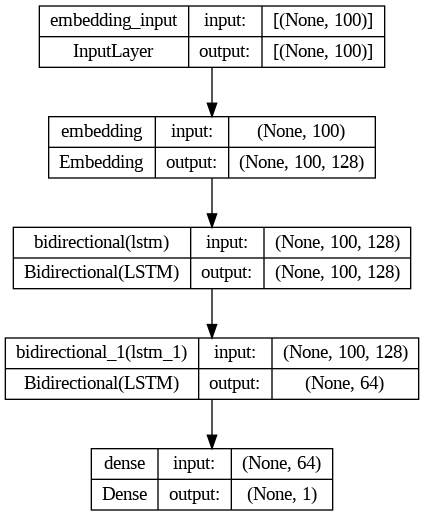

In [14]:
#compile model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_rnn.summary())
print("\n\nModel Visualize")
plot_model(model_rnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
# Train
model_rnn.fit(train_data_tokenized, train_label, epochs=10, batch_size=32, validation_data=(val_data_tokenized, val_label))

Epoch 1/10
25/25 [==============================] - 24s 626ms/step - loss: 0.3709 - accuracy: 0.4013 - val_loss: 0.4918 - val_accuracy: 0.4350
Epoch 2/10
25/25 [==============================] - 11s 426ms/step - loss: -0.5061 - accuracy: 0.4325 - val_loss: 0.7607 - val_accuracy: 0.4950
Epoch 3/10
25/25 [==============================] - 11s 418ms/step - loss: -0.6192 - accuracy: 0.4613 - val_loss: -0.0412 - val_accuracy: 0.4700
Epoch 4/10
25/25 [==============================] - 9s 355ms/step - loss: -1.1750 - accuracy: 0.4363 - val_loss: -0.5221 - val_accuracy: 0.4700
Epoch 5/10
25/25 [==============================] - 6s 235ms/step - loss: -1.8381 - accuracy: 0.4350 - val_loss: -0.9882 - val_accuracy: 0.4650
Epoch 6/10
25/25 [==============================] - 5s 214ms/step - loss: -2.8142 - accuracy: 0.4700 - val_loss: -1.3856 - val_accuracy: 0.5750
Epoch 7/10
25/25 [==============================] - 7s 296ms/step - loss: -3.6810 - accuracy: 0.6388 - val_loss: -1.7854 - val_accuracy:

In [16]:
# Evaluate

loss, acc = model_rnn.evaluate(test_data_tokenized, test_label)
print("loss: ", loss)
print("accuracy: ", acc)

10/10 [==============================] - 1s 97ms/step - loss: -0.5710 - accuracy: 0.6187
loss:  -0.5709630250930786
accuracy:  0.6187499761581421


In [17]:
# Prediction
prediction = model_rnn.predict(test_data_tokenized[:5])

for text, prediction, groundtruth in zip(tokenizer.sequences_to_texts(test_data_tokenized), prediction, test_label[:5]):
    sentiment = "positive" if prediction > 0.5 else "negative"
    groundtruth = "positive" if groundtruth == 0.5 else "negative"
    print(f"Text: {text} \n Predicted Sentiment: {sentiment}\n Groundtruth: {groundtruth}\n\n")

1/1 [==============================] - 2s 2s/step
Text: sustainable strategy for our sustainable strategy range we incorporate a series of proprietary in order to ensure the performing companies from an esg perspective are not eligible for investment 
 Predicted Sentiment: positive
 Groundtruth: negative


Text: environmental health and safety management system provides a framework for identifying and reducing the risks associated with the environments in which we operate regular management system assessments internal and third party compliance and inspections are performed annually at of facilities worldwide the goal of these assessments is to identify and correct site specific issues and to educate and empower facility managers and supervisors to implement corrective actions environment health and safety efforts are and supported by experienced experts around the world that support our operations and facilities 
 Predicted Sentiment: positive
 Groundtruth: negative


Text: in 2019 th

# Word2Vec Embedding

In [18]:
from gensim.models import Word2Vec

In [19]:
word2vec_model = Word2Vec(sentences=train_data, vector_size=128, window = 5, min_count=1, sg=0)

word2vec_model.save("word2vec.model")

In [20]:
embedding_matrix = np.zeros((MAX_WORDS, 128))
for word,i in tokenizer.word_index.items():
    if i < MAX_WORDS:
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word]

In [21]:
# define model
# Hyper parameter sama dengan contoh di slide
word2vec_model = Sequential()
word2vec_model.add(Embedding(input_dim = MAX_WORDS, output_dim = 128, input_length = train_data_tokenized.shape[1], weights= [embedding_matrix], trainable = True ))
word2vec_model.add(Bidirectional(LSTM(64, return_sequences=True)))
word2vec_model.add(Bidirectional(LSTM(32)))
word2vec_model.add(Dense(1,activation='sigmoid'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 100, 128)          98816     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1420097 (5.42 MB)
Trainable params: 1420097 (5.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Model Vis

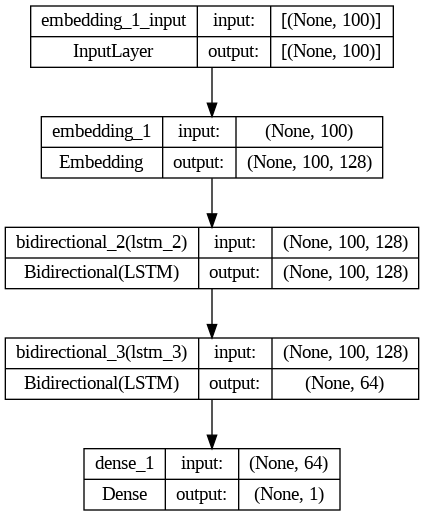

In [22]:
#compile model
word2vec_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(word2vec_model.summary())
print("\n\nModel Visualize")
plot_model(word2vec_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
# Train
word2vec_model.fit(train_data_tokenized, train_label, epochs=10, batch_size=32, validation_data=(val_data_tokenized, val_label))

Epoch 1/10
25/25 [==============================] - 16s 374ms/step - loss: 0.4145 - accuracy: 0.4013 - val_loss: 0.5079 - val_accuracy: 0.4350
Epoch 2/10
25/25 [==============================] - 5s 202ms/step - loss: -0.3222 - accuracy: 0.4275 - val_loss: -0.0336 - val_accuracy: 0.5000
Epoch 3/10
25/25 [==============================] - 7s 302ms/step - loss: -1.5928 - accuracy: 0.6187 - val_loss: -1.1919 - val_accuracy: 0.6600
Epoch 4/10
25/25 [==============================] - 5s 216ms/step - loss: -2.7071 - accuracy: 0.6413 - val_loss: -1.2169 - val_accuracy: 0.6300
Epoch 5/10
25/25 [==============================] - 7s 273ms/step - loss: -3.3444 - accuracy: 0.6463 - val_loss: -1.6906 - val_accuracy: 0.6400
Epoch 6/10
25/25 [==============================] - 11s 439ms/step - loss: -3.8509 - accuracy: 0.6525 - val_loss: -1.7992 - val_accuracy: 0.6400
Epoch 7/10
25/25 [==============================] - 9s 371ms/step - loss: -4.1054 - accuracy: 0.6187 - val_loss: -0.6768 - val_accuracy:

In [24]:
# Evaluate

loss, acc = word2vec_model.evaluate(test_data_tokenized, test_label)
print("loss: ", loss)
print("accuracy: ", acc)

10/10 [==============================] - 1s 56ms/step - loss: -1.1531 - accuracy: 0.6375
loss:  -1.1531360149383545
accuracy:  0.637499988079071


In [25]:
# Prediction
prediction = word2vec_model.predict(test_data_tokenized[:5])

for text, prediction, groundtruth in zip(tokenizer.sequences_to_texts(test_data_tokenized), prediction, test_label[:5]):
    sentiment = "positive" if prediction > 0.5 else "negative"
    groundtruth = "positive" if groundtruth == 0.5 else "negative"
    print(f"Text: {text} \n Predicted Sentiment: {sentiment}\n Groundtruth: {groundtruth}\n\n")

1/1 [==============================] - 2s 2s/step
Text: sustainable strategy for our sustainable strategy range we incorporate a series of proprietary in order to ensure the performing companies from an esg perspective are not eligible for investment 
 Predicted Sentiment: positive
 Groundtruth: negative


Text: environmental health and safety management system provides a framework for identifying and reducing the risks associated with the environments in which we operate regular management system assessments internal and third party compliance and inspections are performed annually at of facilities worldwide the goal of these assessments is to identify and correct site specific issues and to educate and empower facility managers and supervisors to implement corrective actions environment health and safety efforts are and supported by experienced experts around the world that support our operations and facilities 
 Predicted Sentiment: positive
 Groundtruth: negative


Text: in 2019 th

# Attention Based Model

In [54]:
import tensorflow as tf
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments

from sklearn.model_selection import train_test_split
from datasets import load_dataset

from transformers import DistilBertTokenizer, TFDistilBertModel, TFAutoModel, AutoTokenizer
import transformers
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling1D, Attention, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import random

In [55]:
# import datasets
# training_dataset = datasets.DatasetDict({"train":sampled_train_data,"test":sampled_val_data})

In [56]:
from datasets import load_dataset
from datasets import Dataset, DatasetDict
dataset_train = Dataset.from_pandas(pd.read_parquet('./train-00000-of-00001-04b49ae22f595095.parquet', engine='pyarrow').sample(frac=0.01, replace=True, random_state=1))
dataset_test = Dataset.from_pandas(pd.read_parquet('./test-00000-of-00001-3f9f7af4f5914b8e.parquet', engine='pyarrow'))
dataset_train

Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 10
})

In [57]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenized_data_train = tokenizer(dataset_train["text"], return_tensors="np", padding=True)
# Tokenizer returns a BatchEncoding, but we convert that to a dict for Keras
tokenized_data_train = dict(tokenized_data_train)

labels_train = np.array(dataset_train["label"])  # Label is already an array of 0 and 1

In [58]:
from transformers import TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam

# Load and compile our model
model_attention = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased")
# Lower learning rates are often better for fine-tuning transformers
model_attention.compile(optimizer=Adam(3e-5))  # No loss argument!


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [59]:
model_attention.fit(tokenized_data_train, labels_train)


1/1 [==============================] - 118s 118s/step - loss: 0.7619


In [60]:
# Evaluate

tokenized_data_test = tokenizer(dataset_test["text"], return_tensors="np", padding=True)

# Tokenizer returns a BatchEncoding, but we convert that to a dict for Keras
tokenized_data_test = dict(tokenized_data_test)

labels_test = np.array(dataset_test["label"])  # Label is already an array of 0 and 1

loss, acc = model_attention.evaluate(dataset_test["text"], dataset_test["label"])
print("loss: ", loss)
print("accuracy: ", acc)

Token indices sequence length is longer than the specified maximum sequence length for this model (743 > 512). Running this sequence through the model will result in indexing errors


ValueError: ignored

# Report

## Performance

- LSTM MODEL

    Training Accuracy : 0.71

    Test Accuracy : 0.70

- Word2Vec Embedding

    Training Accuracy : 0.70

    Test Accuracy : 0.64
  
- Attention - Based Model

    Training Accuracy : 0.76

    Test Accuracy :

Reference :

- https://huggingface.co/distilbert-base-uncased

-